# Richtungsfelder

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import solve_ivp

In [2]:
# Parameter
Nt = 20     # Anzahl Vektoren in Zeit
Ny = 20     # Anzahl Vektoren in y
t0 = 0. # Startzeit  (x-Achse)
t1  = 2. # Endzeit    (x-Achse)
y0 = 0. # Minimale y (y-Achse)
y1   = 2. # Maximale y (y-Achse)
lamda  = 1. # Zerfalls-Konstante
gamma  = 1. # Windwiderstang

In [3]:
# Differentialgleichungen 
# Zerfallsgesetz
def dNdt(t,y):
    dNdt = - lamda*y
    return dNdt
# Windwiderstand
def dvdt(t,v):
    dvdt = -gamma*v**2
    return dvdt

In [4]:
# Gitter des Richtungsfeld
t = np.linspace(t0,t1,Nt)
y = np.linspace(y0,y1,Ny)
[TY,Y] = plt.meshgrid(t,y)
v = np.linspace(y0,y1,Ny)
[TV,V] = plt.meshgrid(t,v)

# Berechne Richtungsfelder
dYdT = dNdt(TY,Y)
dVdT = dvdt(TV,V)
# Vektor-Komponenten des Richtungsfelds
V_tN = 1./np.sqrt(1. + dYdT**2)  
V_N = V_tN*dYdT
V_tv = 1./np.sqrt(1. + dVdT**2)
V_v = V_tv*dVdT
# Berechne die Lösungen der DGLn
t_span = np.array([t0,t1])
t_eval = np.linspace(t0,t1,100)
solN1 = solve_ivp(dNdt,t_span,(0., 2.),t_eval=t_eval, method = 'RK45', rtol = 1.e-8, atol = 1.e-10)
solN2 = solve_ivp(dNdt,t_span,(0., 1.),t_eval=t_eval, method = 'RK45', rtol = 1.e-8, atol = 1.e-10)
solv1 = solve_ivp(dvdt,t_span,(0., 2.),t_eval=t_eval, method = 'RK45', rtol = 1.e-8, atol = 1.e-10)
solv2 = solve_ivp(dvdt,t_span,(0., 1.),t_eval=t_eval, method = 'RK45', rtol = 1.e-8, atol = 1.e-10)

<IPython.core.display.Javascript object>


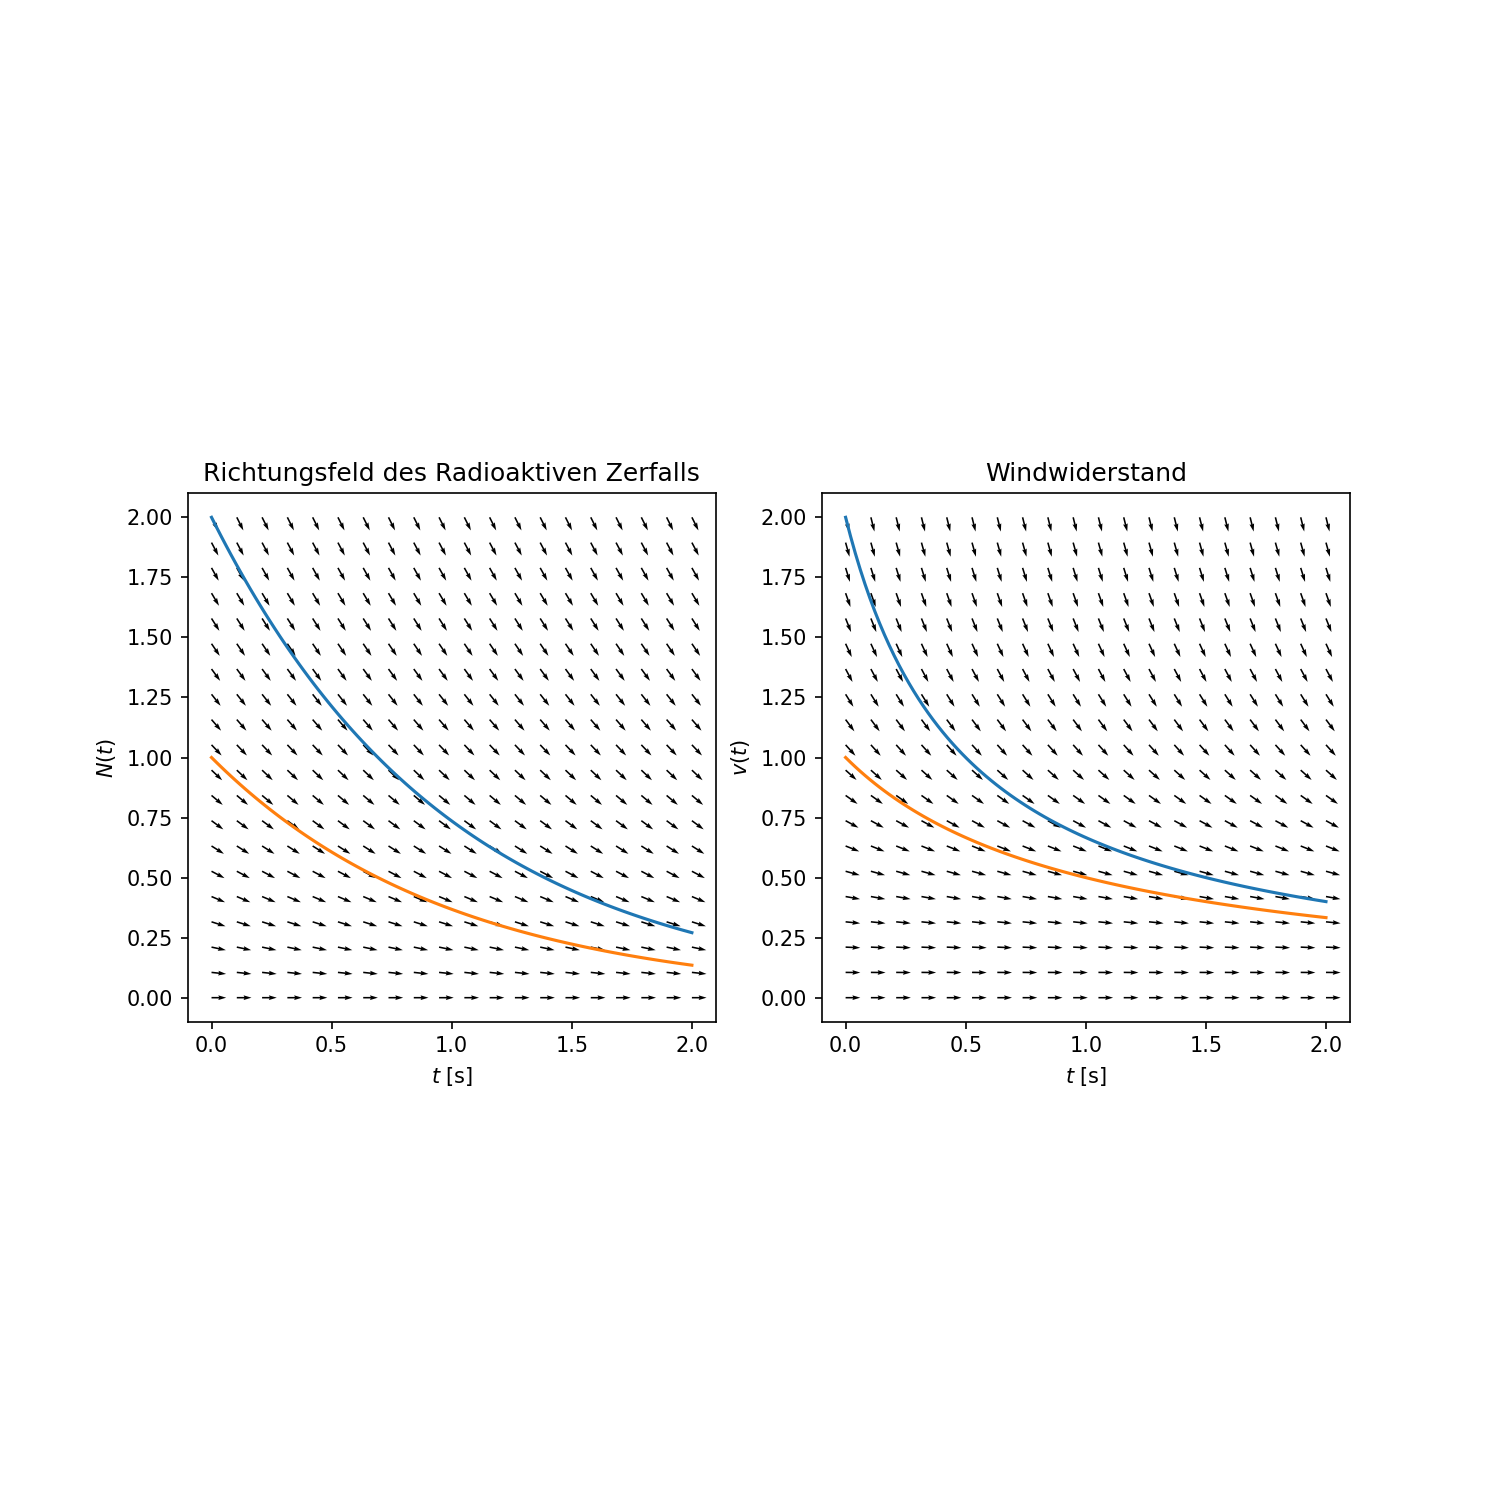

Text(0, 0.5, '$v(t)$')

In [5]:
%matplotlib notebook
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
#fig.subplots_adjust(left=0.1,
#                    bottom=0.1,
#                    right=0.9,
#                    top=0.2,
#                    wspace=0.1,
#                    hspace=0.3)
# Zeichne Richtungsfeld für N(t)
ax[0].quiver(TY,Y,V_tN,V_N)
# Zwei Paar Loesungskurven
ax[0].plot(t_eval,solN1.y[1])
ax[0].plot(t_eval,solN2.y[1])
# Plot setup
ax[0].set_aspect(1.)
ax[0].set_title(r"Richtungsfeld des Radioaktiven Zerfalls")
ax[0].set_xlabel(r"$t$ [s]")
ax[0].set_ylabel(r"$N(t)$")
#
# Zeichne Richtungsfeld für v(t)
ax[1].quiver(TV,V,V_tv,V_v)
# Zwei Paar Loesungskurven
ax[1].plot(t_eval,solv1.y[1])
ax[1].plot(t_eval,solv2.y[1])
# Plot setup
ax[1].set_aspect(1.)
ax[1].set_title(r"Windwiderstand")
ax[1].set_xlabel(r"$t$ [s]")
ax[1].set_ylabel(r"$v(t)$")
#ax[1].legend()
#ax[1].savefig('richtungsfeld2.png')
#plt.show()